<a href="https://colab.research.google.com/github/ravikanth995/Projects/blob/master/Social_media_ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.value_counts()

User ID   Gender  Age  EstimatedSalary  Purchased
15566689  Female  35   57000            0            1
15728773  Male    27   58000            0            1
15734312  Male    38   71000            0            1
15734161  Female  37   93000            1            1
15733973  Female  47   113000           1            1
                                                    ..
15654296  Female  50   20000            1            1
15654230  Female  55   130000           1            1
15652400  Female  38   50000            0            1
15651983  Male    34   112000           1            1
15815236  Female  45   131000           1            1
Length: 400, dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# **Plot Graphs**

How Many Males and Females are there?

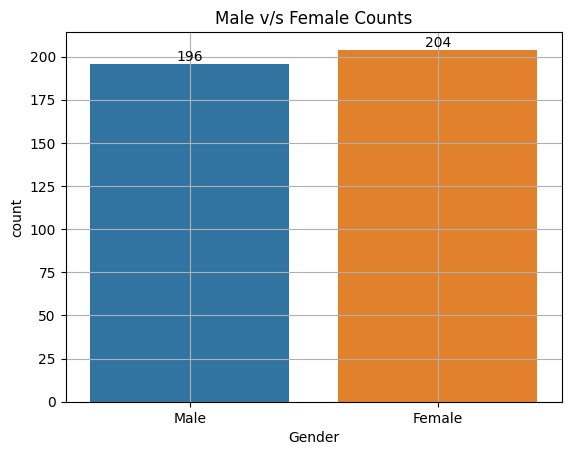

In [10]:
ax = sns.countplot(x = 'Gender', data = df, width = 0.8)
for bars in ax.containers:
  ax.bar_label(bars)
  plt.grid(True)
  plt.title('Male v/s Female Counts')


Females are more than Males in Social Media Advertisment Ads

Which Gender had the more Salary

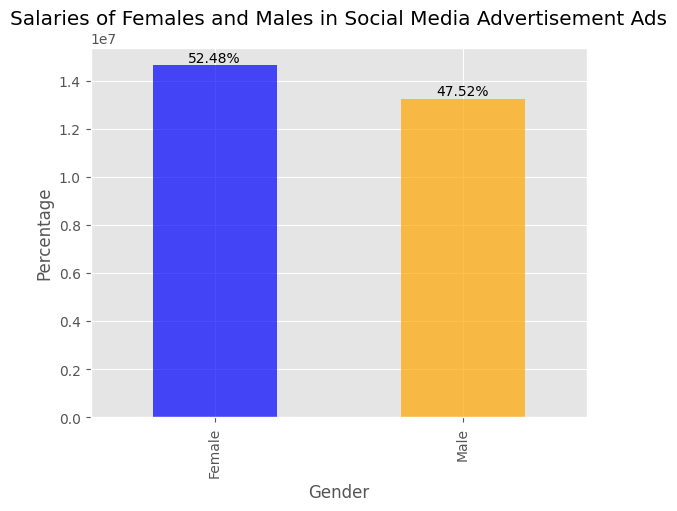

In [11]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
colors = ['blue', 'orange']
data_group = df.groupby('Gender')['EstimatedSalary'].sum()
total_sum = data_group.sum()
data_group_percent = (data_group / total_sum) * 100

ax = data_group.plot(kind='bar', color=colors, alpha=0.7)
plt.bar_label(ax.containers[0], labels=[f'{val:.2f}%' for val in data_group_percent], label_type='edge')

plt.title('Salaries of Females and Males in Social Media Advertisement Ads')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()


Salaries of Females are about 54.48% and Males are of about 47.52% Share. 



**Which Age Purchased Often**

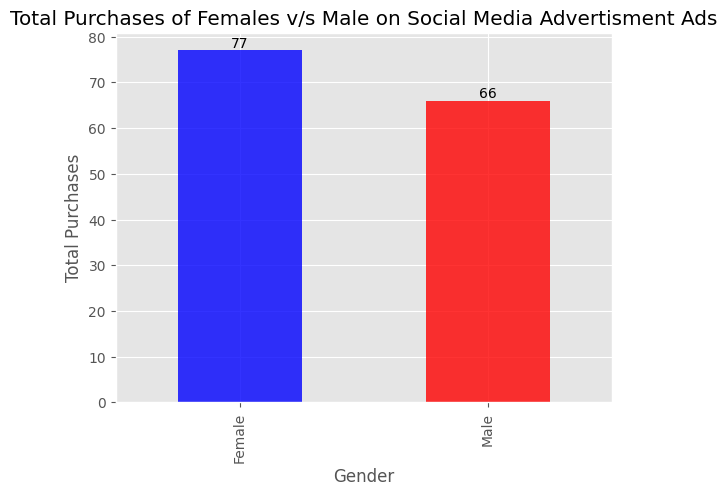

In [12]:
data_group = df.groupby('Gender')['Purchased'].sum()
colors = ['blue', 'red']
ax = data_group.plot(kind = 'bar', color = colors, alpha = 0.8)
plt.bar_label(ax.containers[0], fmt = '%d', label_type = 'edge')
plt.grid(True)
plt.title('Total Purchases of Females v/s Male on Social Media Advertisment Ads')
plt.ylabel('Total Purchases')
plt.show()

Female Purchase More through Social Media Advertisment Ads Than Males

Which Age Group has the More Salary?

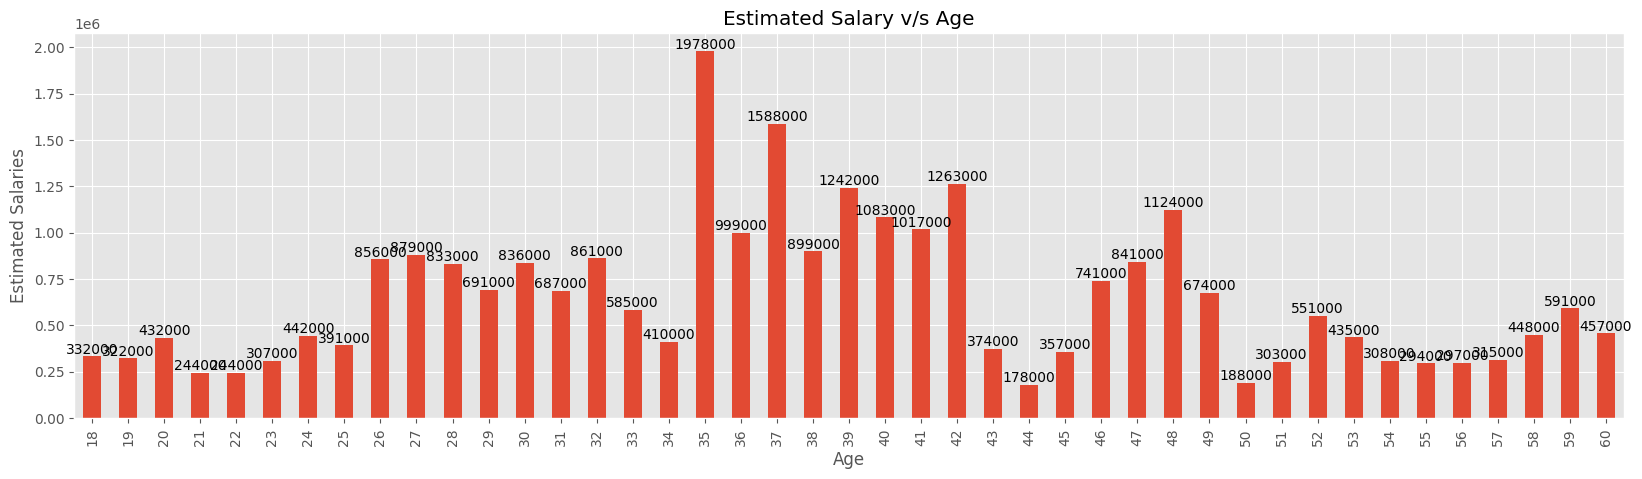

In [13]:
plt.figure(figsize = (20,5))
plt.style.use('ggplot')

data_group = df.groupby('Age')['EstimatedSalary'].sum()
ax = data_group.plot(kind = 'bar')
plt.bar_label(ax.containers[0], fmt = '%d', label_type = 'edge')
plt.title("Estimated Salary v/s Age")
plt.ylabel('Estimated Salaries')
plt.grid(True)
plt.show()

The Age of 35 had the Most Salaried followed by the 36 and 37

Donut Chart Representation By Gender and Salary

In [17]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

How Many Purchased to the How Many Not Purchased Through SOcial Media Advertisment Ads ?

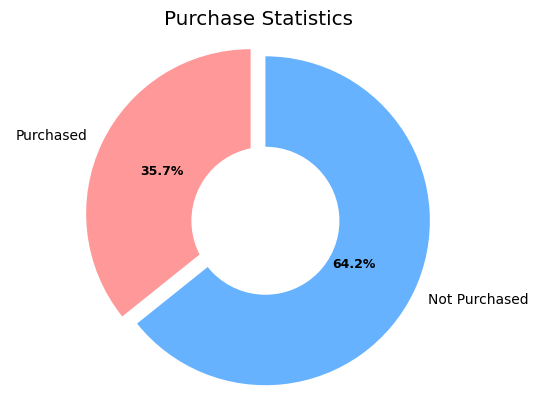

In [30]:
labels = ['Purchased', 'Not Purchased']
sizes = [sum(df['Purchased']), len(df)-sum(df['Purchased'])]
colors = ['#FF9999','#66B2FF']
explode = [0.1, 0]  

fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode)

# Adding a circle at the center to create a donut chart
center_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

# Move percentage labels inside the donut chart
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

# Title
plt.title('Purchase Statistics')

# Display the chart
plt.show()

TOtal of the 64.2% Have not Purchased through Social Media Ads but only 35.7% of the People have purchased.

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '5'),
 Text(0, 0, '7'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '8'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '7')]

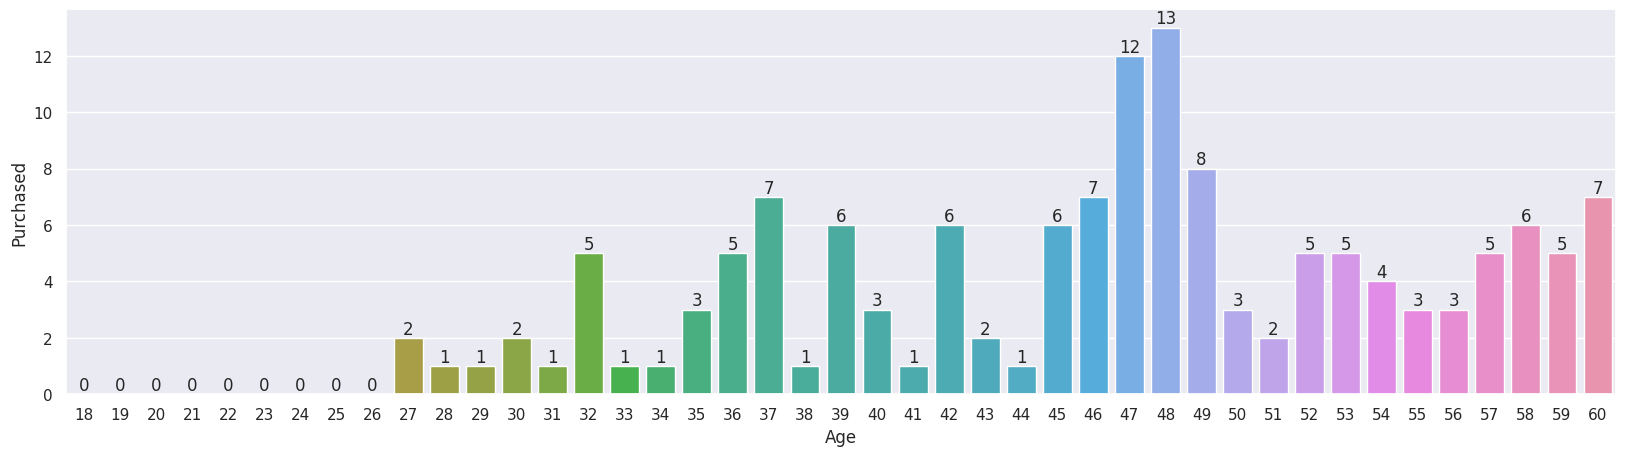

In [34]:
sales_state = df.groupby(['Age'], as_index=False)['Purchased'].sum().sort_values(by='Purchased', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data = sales_state, x = 'Age',y= 'Purchased')
plt.bar_label(ax.containers[0], fmt = '%d', label_type = 'edge')



Most of the Purchase are from the 48 and 47 Age Group. 

<function matplotlib.pyplot.show(close=None, block=None)>

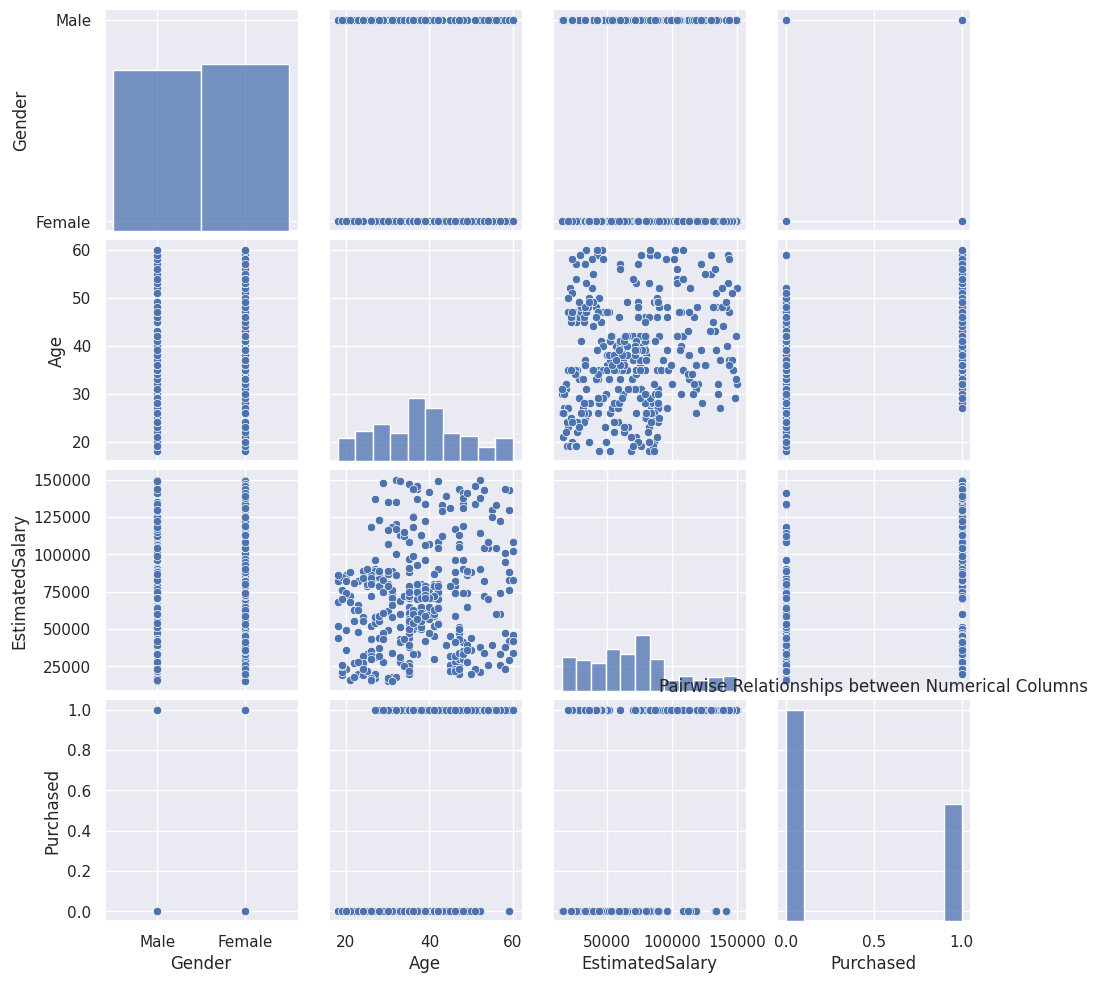

In [39]:
numerical_columns = ['Gender', 'Age', 'EstimatedSalary', 'Purchased']
sns.pairplot(df, vars=numerical_columns)
plt.title('Pairwise Relationships between Numerical Columns')
plt.show

**Conclusion : ** Social Media Advertisement Ads  has influenced the Females of age Group between 28-48 to Purchase through Ads but Male Group of Same Age Group was not much interested on Social Media Ads Purchase.